In [40]:
import numpy as np
import pandas as pd

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [41]:
df = pd.read_csv('./data/wine.csv', header=None)

In [42]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [43]:
df[12].value_counts()

0    4898
1    1599
Name: 12, dtype: int64

In [44]:
# 와인속성 : x
# 와인분류 : y

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
# 학습 셋, 테스트 셋 분리

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [46]:
# 모델 구조 설정

model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 모델 저장 설정 실행
modelpath = './model/all/{epoch:02d}-{val_accuracy:.04f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose = 1)



# 모델 실행
# history = model.fit(x_train, y_train, epochs = 50, batch_size=500, validation_split = 0.25)
history = model.fit(x_train, y_train, epochs = 50, batch_size=500, validation_split = 0.25, verbose=1, 
                    callbacks=[checkpointer])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 30)                390       
                                                                 
 dense_33 (Dense)            (None, 12)                372       
                                                                 
 dense_34 (Dense)            (None, 8)                 104       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/8 [==>...........................] - ETA: 1s - loss: 0.5272 - accuracy: 0.8100
Epoch 1: saving model to ./model/all\01-0.8131.hdf5
8/8 [==============================] - 0s 16

In [47]:
# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test Dataset acc :', round(score[1], 2))

41/41 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9492
Test Dataset acc : 0.95


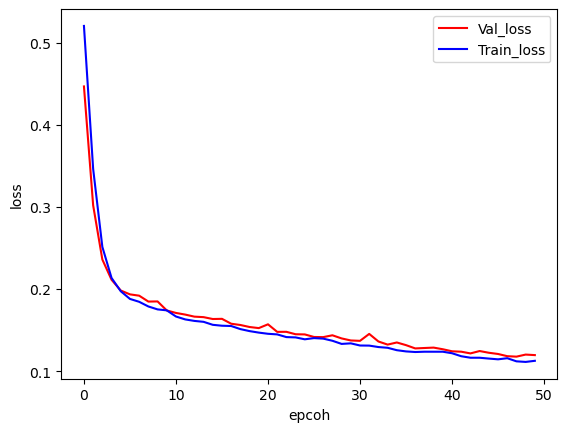

In [48]:
# 그래프로 과적합 확인하기
hist_df = pd.DataFrame(history.history)

# val_loss, val_acc 변화 보기
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

# x값을 지정, 테스트셋(검증용 셋)의 오차 >> 빨간색으로 학습셋 오차 >> 파란색

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, c = 'red', markersize = 2, label = 'Val_loss')
plt.plot(x_len, y_loss,  c = 'blue', markersize = 2, label = 'Train_loss')

plt.legend(loc = 'best')
plt.xlabel('epcoh')
plt.ylabel('loss')
plt.show()

In [49]:
# 테스트 결과 출력

score = model.evaluate(x_test, y_test)
print('test_acc:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1267 - accuracy: 0.9492
test_acc: 0.9492307901382446


In [51]:
# 모델 구조 설정

model = Sequential()
model.add(Dense(30, input_dim = 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# 모델 저장 설정 실행
modelpath = './model/all/{epoch:02d}-{val_accuracy:.04f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)


# 모델 실행
# history = model.fit(x_train, y_train, epochs = 50, batch_size=500, validation_split = 0.25)
history = model.fit(x_train, y_train, epochs = 2000, batch_size=500, validation_split = 0.25, verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer], )

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 30)                390       
                                                                 
 dense_41 (Dense)            (None, 12)                372       
                                                                 
 dense_42 (Dense)            (None, 8)                 104       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
1/8 [==>...........................] - ETA: 1s - loss: 3.2874 - accuracy: 0.7420
Epoch 1: val_loss improved from inf to 2.73260, saving model to ./model/all\01-0.7562.hdf5
8/

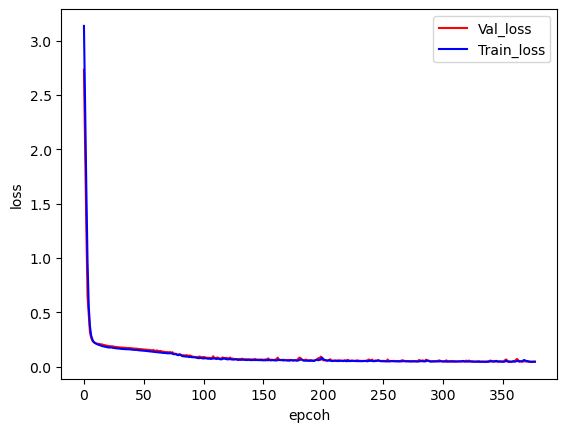

In [52]:
# 그래프로 과적합 확인하기
hist_df = pd.DataFrame(history.history)

# val_loss, val_acc 변화 보기
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

# x값을 지정, 테스트셋(검증용 셋)의 오차 >> 빨간색으로 학습셋 오차 >> 파란색

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, c = 'red', markersize = 2, label = 'Val_loss')
plt.plot(x_len, y_loss,  c = 'blue', markersize = 2, label = 'Train_loss')

plt.legend(loc = 'best')
plt.xlabel('epcoh')
plt.ylabel('loss')
plt.show()

In [53]:
# 테스트 결과 출력

score = model.evaluate(x_test, y_test)
print('test_acc:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0594 - accuracy: 0.9838
test_acc: 0.983846127986908
